# Thresholds for "random" in fingerprints the RDKit supports

This is an updated version of a post. The original version of the notebook can be [found in github](https://github.com/greglandrum/rdkit_blog/blob/936b35b77ddca3e843991d1c4b1e3532e754b734/notebooks/Fingerprint%20Thresholds.ipynb).

A frequent question that comes up when considering fingerprint similarity is: "What threshold should I use to determine what a neighbor is?" The answer is poorly defined. Of course it depends heavily on the details of the fingerprint, but there's also a very subjective component: you want to pick a low enough threshold that you're sure you won't miss anything, but you don't want to pick up too much noise.

The goal here is to systematically come up with some guidelines that can be used for fingerprints supported within the RDKit. We will do that by looking a similarities between random "drug-like" (MW<600) molecules picked from ChEMBL.

For the analysis, the 25K similarity values are sorted and the values at particular threshold are examined. 

There's a fair amount of code and results below, so here's the summary table. To help interpret this: 22500 of the 25000 pairs (90%) have a MACCS keys similarity value less than 0.528. 


<table>
<tr><th>Fingerprint</th><th>Metric</th><th>90% level</th><th>95% level</th><th>99% level</th></tr>
<tr>
  <td>MACCS</td><td>Tanimoto</td>
  <td>0.528</td>
  <td>0.573</td>
  <td>0.652</td>
</tr>
<tr>
  <td>MFP0 (counts)</td><td>Tanimoto</td>
  <td>0.525</td>
  <td>0.568</td>
  <td>0.649</td>
</tr>
<tr>
  <td>MFP1 (counts)</td><td>Tanimoto</td>
  <td>0.333</td>
  <td>0.365</td>
  <td>0.428</td>
</tr>
<tr>
  <td>MFP2 (counts)</td><td>Tanimoto</td>
  <td>0.230</td>
  <td>0.255</td>
  <td>0.306</td>
</tr>
<tr>
  <td>MFP3 (counts)</td><td>Tanimoto</td>
  <td>0.178</td>
  <td>0.198</td>
  <td>0.240</td>
</tr>
<tr>
  <td>MFP0 (bits)</td><td>Tanimoto</td>
  <td>0.529</td>
  <td>0.571</td>
  <td>0.654</td>
</tr>
<tr>
  <td>MFP1 (bits)</td><td>Tanimoto</td>
  <td>0.341</td>
  <td>0.372</td>
  <td>0.437</td>
</tr>
<tr>
  <td>MFP2 (bits)</td><td>Tanimoto</td>
  <td>0.246</td>
  <td>0.272</td>
  <td>0.321</td>
</tr>
<tr>
  <td>MFP3 (bits)</td><td>Tanimoto</td>
  <td>0.203</td>
  <td>0.224</td>
  <td>0.264</td>
</tr>
<tr>
  <td>FeatMFP0 (counts)</td><td>Tanimoto</td>
  <td>0.692</td>
  <td>0.742</td>
  <td>0.825</td>
</tr>
<tr>
  <td>FeatMFP1 (counts)</td><td>Tanimoto</td>
  <td>0.472</td>
  <td>0.512</td>
  <td>0.584</td>
</tr>
<tr>
  <td>FeatMFP2 (counts)</td><td>Tanimoto</td>
  <td>0.333</td>
  <td>0.364</td>
  <td>0.425</td>
</tr>
<tr>
  <td>FeatMFP3 (counts)</td><td>Tanimoto</td>
  <td>0.255</td>
  <td>0.278</td>
  <td>0.331</td>
</tr>
<tr>
  <td>FeatMFP0 (bits)</td><td>Tanimoto</td>
  <td>0.692</td>
  <td>0.741</td>
  <td>0.825</td>
</tr><tr>
  <td>FeatMFP1 (bits)</td><td>Tanimoto</td>
  <td>0.476</td>
  <td>0.516</td>
  <td>0.587</td>
</tr><tr>
  <td>FeatMFP2 (bits)</td><td>Tanimoto</td>
  <td>0.346</td>
  <td>0.376</td>
  <td>0.438</td>
</tr><tr>
  <td>FeatMFP3 (bits)</td><td>Tanimoto</td>
  <td>0.275</td>
  <td>0.299</td>
  <td>0.349</td>
</tr><tr>
  <td>RDKit4</td><td>Tanimoto</td>
  <td>0.283</td>
  <td>0.325</td>
  <td>0.425</td>
</tr><tr>
  <td>RDKit5</td><td>Tanimoto</td>
  <td>0.255</td>
  <td>0.286</td>
  <td>0.370</td>
</tr><tr>
  <td>RDKit6</td><td>Tanimoto</td>
  <td>0.282</td>
  <td>0.307</td>
  <td>0.367</td>
</tr><tr>
  <td>RDKit7</td><td>Tanimoto</td>
  <td>0.390</td>
  <td>0.429</td>
  <td>0.510</td>
</tr><tr>
  <td>RDKit4 (linear)</td><td>Tanimoto</td>
  <td>0.307</td>
  <td>0.354</td>
  <td>0.462</td>
</tr><tr>
  <td>RDKit5 (linear)</td><td>Tanimoto</td>
  <td>0.268</td>
  <td>0.307</td>
  <td>0.406</td>
</tr><tr>
  <td>RDKit6 (linear)</td><td>Tanimoto</td>
  <td>0.248</td>
  <td>0.280</td>
  <td>0.366</td>
</tr>
<tr>
  <td>RDKit7 (linear)</td><td>Tanimoto</td>
  <td>0.235</td>
  <td>0.263</td>
  <td>0.339</td>
</tr>
<tr>
  <td>Atom pairs (counts)</td><td>Tanimoto</td>
  <td>0.238</td>
  <td>0.266</td>
  <td>0.326</td>
</tr>
<tr>
  <td>Torsions (counts)</td><td>Tanimoto</td>
  <td>0.165</td>
  <td>0.198</td>
  <td>0.264</td>
</tr>
<tr>
  <td>Atom pairs (bits)</td><td>Tanimoto</td>
  <td>0.336</td>
  <td>0.364</td>
  <td>0.415</td>
</tr>
<tr>
  <td>Torsions (bits)</td><td>Tanimoto</td>
  <td>0.190</td>
  <td>0.221</td>
  <td>0.290</td>
</tr>
<tr>
  <td>Avalon (512 bits)</td><td>Tanimoto</td>
  <td>0.462</td>
  <td>0.504</td>
  <td>0.579</td>
</tr>
<tr>
  <td>Avalon (1024 bits)</td><td>Tanimoto</td>
  <td>0.341</td>
  <td>0.377</td>
  <td>0.451</td>
</tr>
<tr>
  <td>Avalon (512 bits)</td><td>Tanimoto</td>
  <td>0.462</td>
  <td>0.504</td>
  <td>0.579</td>
</tr>
<tr>
  <td>Avalon (1024 bits)</td><td>Tanimoto</td>
  <td>0.341</td>
  <td>0.377</td>
  <td>0.451</td>
</tr>
<tr>
  <td>Avalon counts (512 bits)</td><td>Tanimoto</td>
  <td>0.381</td>
  <td>0.417</td>
  <td>0.497</td>
</tr>
<tr>
  <td>Avalon counts (1024 bits)</td><td>Tanimoto</td>
  <td>0.346</td>
  <td>0.384</td>
  <td>0.469</td>
</tr>
</table>


In [6]:
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
from rdkit.Avalon import pyAvalonTools
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit import rdBase
from rdkit import DataStructs
from collections import defaultdict
import pickle,random,gzip
print(rdBase.rdkitVersion)
import time
print(time.asctime())
%pylab inline

2019.09.1dev1
Mon May 27 13:23:11 2019
Populating the interactive namespace from numpy and matplotlib


/other_linux/home/glandrum/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Read in the data

We're using the set of 25K reference pairs generated in an earlier post: http://rdkit.blogspot.ch/2013/10/building-similarity-comparison-set-goal.html

As a quick reminder: these are pairs of molecules taken from ChEMBL with MW<600 and a count-based MFP0 similarity of at least 0.7 to each other.

In [2]:
ind = [x.split() for x in gzip.open('../data/chembl16_25K.pairs.txt.gz')]
ms1 = []
ms2 = []
for i,row in enumerate(ind):
    m1 = Chem.MolFromSmiles(row[1])
    ms1.append((row[0],m1))
    m2 = Chem.MolFromSmiles(row[3])
    ms2.append((row[2],m2))
    


Those pairs are related to each other, but we want random pairs, so shuffle the second list:

In [3]:
random.seed(23)
random.shuffle(ms2)

In [43]:
try:
    import ipyparallel as ipp
    rc = ipp.Client()
    dview = rc[:]
    dview.execute('from rdkit import Chem')
    dview.execute('from rdkit import Descriptors')
    dview.execute('from rdkit.Chem import rdMolDescriptors')
    dview.execute('from rdkit.Avalon import pyAvalonTools')
except:
    print("could not use ipyparallel")
    dview = None
    
def compareFPs(ms1,ms2,fpfn,fpName):
    if dview is not None:
        fps = dview.map_sync(lambda x:fpfn(x[1]),ms1)
        fp2s = dview.map_sync(lambda x:fpfn(x[1]),ms2)
    else:
        fps = [fpfn(x[1]) for x in ms1]
        fp2s = [fpfn(x[1]) for x in ms2]
    sims = [DataStructs.TanimotoSimilarity(x,y) for x,y in zip(fps,fp2s)]
    sl = sorted(sims)
    np = len(sl)
    for bin in (.7,.8,.9,.95,.99):
        print( bin,sl[int(bin*np)])
    hist(sims,bins=20)
    xlabel(fpName)
    

# MACCS

0.7 0.43243243243243246
0.8 0.47297297297297297
0.9 0.5277777777777778
0.95 0.573170731707317
0.99 0.6515151515151515


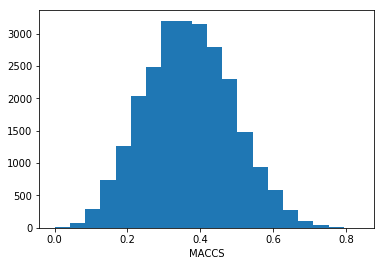

In [13]:
compareFPs(ms1,ms2,lambda x:rdMolDescriptors.GetMACCSKeysFingerprint(x),"MACCS")


# Morgan FPs

## count based

0.7 0.42857142857142855
0.8 0.46875
0.9 0.525
0.95 0.5675675675675675
0.99 0.6486486486486487


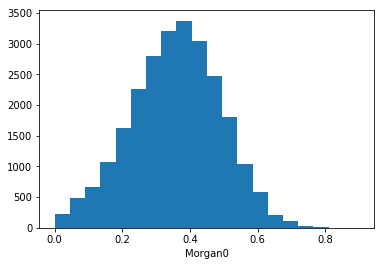

In [14]:
compareFPs(ms1,ms2,lambda x:rdMolDescriptors.GetMorganFingerprint(x,0),"Morgan0")


0.7 0.2647058823529412
0.8 0.2926829268292683
0.9 0.3333333333333333
0.95 0.36470588235294116
0.99 0.42857142857142855


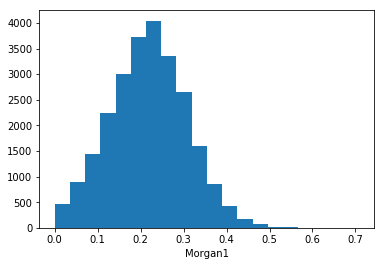

In [15]:
compareFPs(ms1,ms2,lambda x:rdMolDescriptors.GetMorganFingerprint(x,1),"Morgan1")

0.7 0.18045112781954886
0.8 0.2
0.9 0.22962962962962963
0.95 0.25547445255474455
0.99 0.3064516129032258


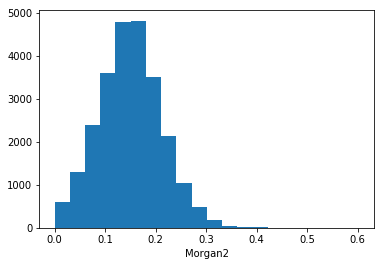

In [16]:
compareFPs(ms1,ms2,lambda x:rdMolDescriptors.GetMorganFingerprint(x,2),"Morgan2")

0.7 0.1402439024390244
0.8 0.1553398058252427
0.9 0.17791411042944785
0.95 0.1981981981981982
0.99 0.23952095808383234


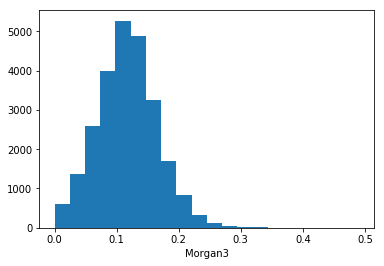

In [17]:
compareFPs(ms1,ms2,lambda x:rdMolDescriptors.GetMorganFingerprint(x,3),"Morgan3")

## bit-vector based

0.7 0.4358974358974359
0.8 0.47368421052631576
0.9 0.5294117647058824
0.95 0.5714285714285714
0.99 0.6538461538461539


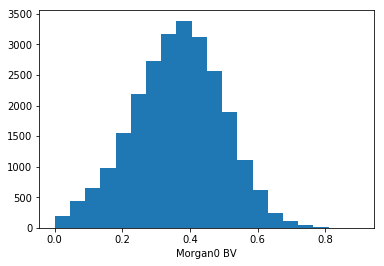

In [18]:
compareFPs(ms1,ms2,lambda x:rdMolDescriptors.GetHashedMorganFingerprint(x,0,1024),"Morgan0 BV")


0.7 0.2727272727272727
0.8 0.30097087378640774
0.9 0.34065934065934067
0.95 0.37254901960784315
0.99 0.43661971830985913


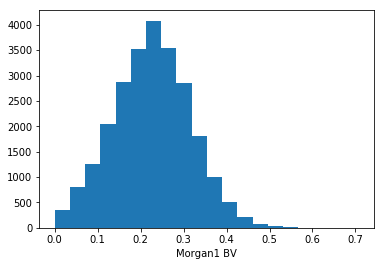

In [19]:
compareFPs(ms1,ms2,lambda x:rdMolDescriptors.GetHashedMorganFingerprint(x,1,1024),"Morgan1 BV")


0.7 0.19672131147540983
0.8 0.21678321678321677
0.9 0.24603174603174602
0.95 0.2719298245614035
0.99 0.32142857142857145


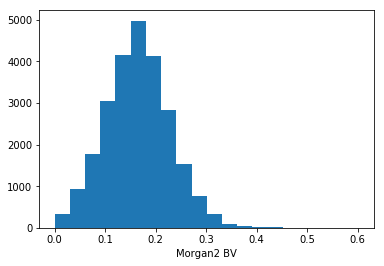

In [20]:
compareFPs(ms1,ms2,lambda x:rdMolDescriptors.GetHashedMorganFingerprint(x,2,1024),"Morgan2 BV")


0.7 0.16463414634146342
0.8 0.18012422360248448
0.9 0.20279720279720279
0.95 0.2236842105263158
0.99 0.26424870466321243


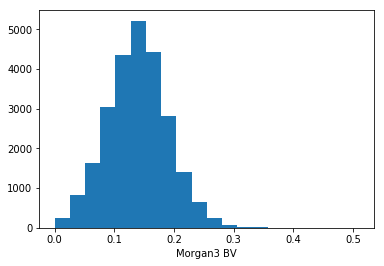

In [21]:
compareFPs(ms1,ms2,lambda x:rdMolDescriptors.GetHashedMorganFingerprint(x,3,1024),"Morgan3 BV")


# FeatMorgan

## count based

0.7 0.5862068965517241
0.8 0.6333333333333333
0.9 0.6923076923076923
0.95 0.7419354838709677
0.99 0.825


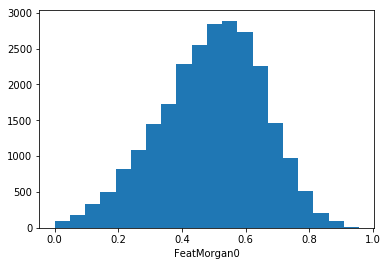

In [22]:
compareFPs(ms1,ms2,lambda x:rdMolDescriptors.GetMorganFingerprint(x,0,useFeatures=True),"FeatMorgan0")


0.7 0.391304347826087
0.8 0.425531914893617
0.9 0.4722222222222222
0.95 0.5121951219512195
0.99 0.5844155844155844


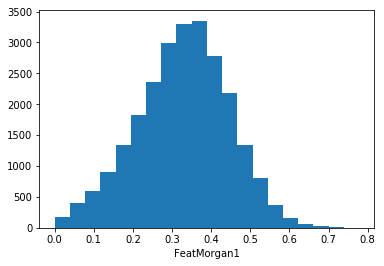

In [23]:
compareFPs(ms1,ms2,lambda x:rdMolDescriptors.GetMorganFingerprint(x,1,useFeatures=True),"FeatMorgan1")


0.7 0.2727272727272727
0.8 0.2980769230769231
0.9 0.3333333333333333
0.95 0.36363636363636365
0.99 0.42528735632183906


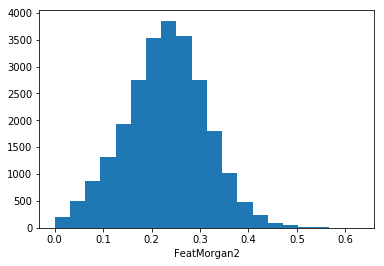

In [24]:
compareFPs(ms1,ms2,lambda x:rdMolDescriptors.GetMorganFingerprint(x,2,useFeatures=True),"FeatMorgan2")


0.7 0.20945945945945946
0.8 0.22839506172839505
0.9 0.2553191489361702
0.95 0.2781456953642384
0.99 0.33121019108280253


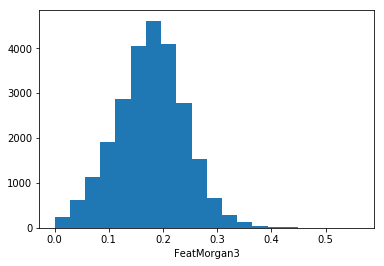

In [25]:
compareFPs(ms1,ms2,lambda x:rdMolDescriptors.GetMorganFingerprint(x,3,useFeatures=True),"FeatMorgan3")


## bit vectors

0.7 0.5862068965517241
0.8 0.6333333333333333
0.9 0.6923076923076923
0.95 0.7419354838709677
0.99 0.825


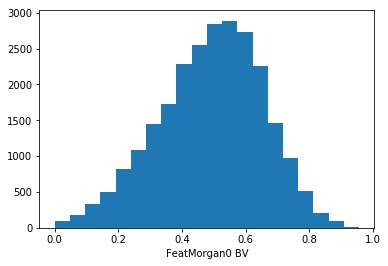

In [26]:
compareFPs(ms1,ms2,lambda x:rdMolDescriptors.GetHashedMorganFingerprint(x,0,1024,useFeatures=True),"FeatMorgan0 BV")


0.7 0.3958333333333333
0.8 0.42857142857142855
0.9 0.47619047619047616
0.95 0.5161290322580645
0.99 0.5873015873015873


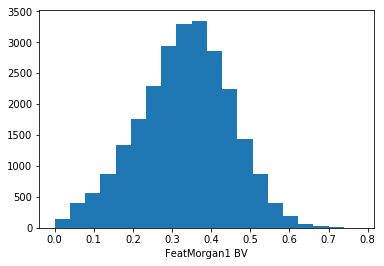

In [27]:
compareFPs(ms1,ms2,lambda x:rdMolDescriptors.GetHashedMorganFingerprint(x,1,1024,useFeatures=True),"FeatMorgan1 BV")


0.7 0.2845528455284553
0.8 0.31092436974789917
0.9 0.3465346534653465
0.95 0.3761467889908257
0.99 0.4375


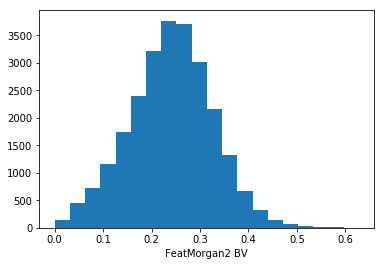

In [28]:
compareFPs(ms1,ms2,lambda x:rdMolDescriptors.GetHashedMorganFingerprint(x,2,1024,useFeatures=True),"FeatMorgan2 BV")


0.7 0.22857142857142856
0.8 0.24848484848484848
0.9 0.2753623188405797
0.95 0.2992125984251969
0.99 0.3488372093023256


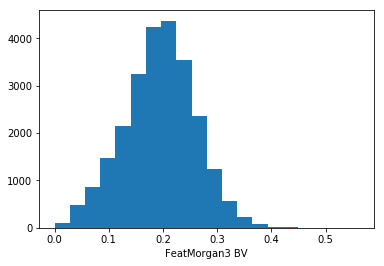

In [29]:
compareFPs(ms1,ms2,lambda x:rdMolDescriptors.GetHashedMorganFingerprint(x,3,1024,useFeatures=True),"FeatMorgan3 BV")


# RDKit

## Branched (default)

0.7 0.21033210332103322
0.8 0.2391304347826087
0.9 0.28273809523809523
0.95 0.3253731343283582
0.99 0.425


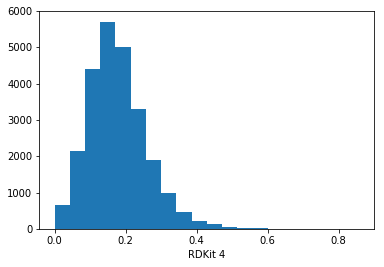

In [30]:
compareFPs(ms1,ms2,lambda x:Chem.RDKFingerprint(x,maxPath=4),"RDKit 4")


0.7 0.19696969696969696
0.8 0.21888412017167383
0.9 0.25473684210526315
0.95 0.2865853658536585
0.99 0.37020316027088035


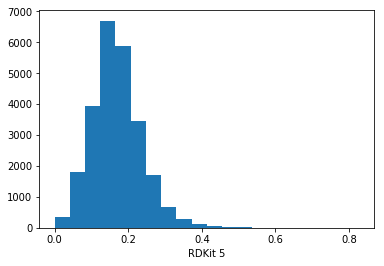

In [31]:
compareFPs(ms1,ms2,lambda x:Chem.RDKFingerprint(x,maxPath=5),"RDKit 5")


0.7 0.23023715415019763
0.8 0.2510775862068966
0.9 0.2815734989648033
0.95 0.3074074074074074
0.99 0.3669064748201439


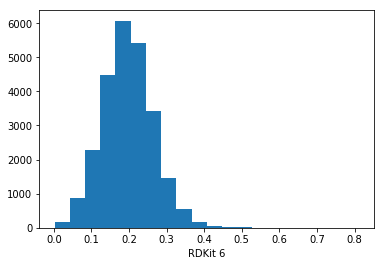

In [32]:
compareFPs(ms1,ms2,lambda x:Chem.RDKFingerprint(x,maxPath=6),"RDKit 6")


0.7 0.31443298969072164
0.8 0.3459563543003851
0.9 0.3905249679897567
0.95 0.42900670322973794
0.99 0.510148107515085


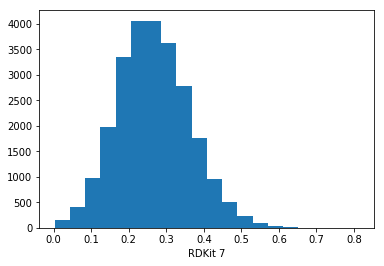

In [33]:
compareFPs(ms1,ms2,lambda x:Chem.RDKFingerprint(x,maxPath=7),"RDKit 7")


## linear

0.7 0.22580645161290322
0.8 0.2585034013605442
0.9 0.30714285714285716
0.95 0.35403726708074534
0.99 0.4625


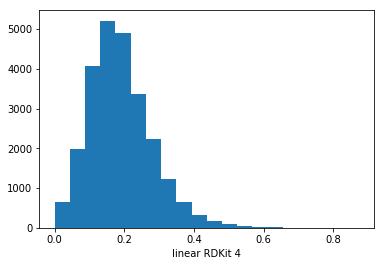

In [34]:
compareFPs(ms1,ms2,lambda x:Chem.RDKFingerprint(x,maxPath=4,branchedPaths=False),"linear RDKit 4")


0.7 0.1983640081799591
0.8 0.22556390977443608
0.9 0.26851851851851855
0.95 0.30716723549488056
0.99 0.40594059405940597


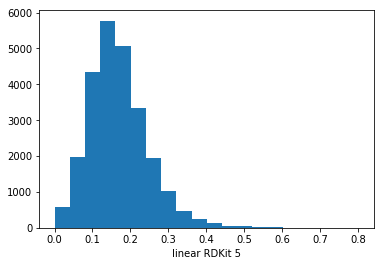

In [35]:
compareFPs(ms1,ms2,lambda x:Chem.RDKFingerprint(x,maxPath=5,branchedPaths=False),"linear RDKit 5")


0.7 0.1870860927152318
0.8 0.210016155088853
0.9 0.24761904761904763
0.95 0.28
0.99 0.36585365853658536


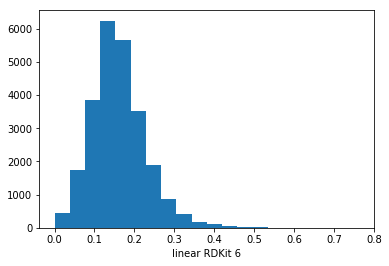

In [36]:
compareFPs(ms1,ms2,lambda x:Chem.RDKFingerprint(x,maxPath=6,branchedPaths=False),"linear RDKit 6")


0.7 0.1830601092896175
0.8 0.203125
0.9 0.23529411764705882
0.95 0.2631578947368421
0.99 0.33884297520661155


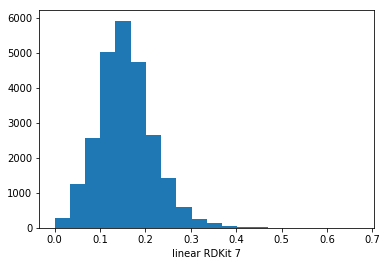

In [37]:
compareFPs(ms1,ms2,lambda x:Chem.RDKFingerprint(x,maxPath=7,branchedPaths=False),"linear RDKit 7")


# Atom pairs and torsions

## count-based

0.7 0.18010291595197256
0.8 0.20419847328244276
0.9 0.23769730733519034
0.95 0.26617179215270415
0.99 0.3263888888888889


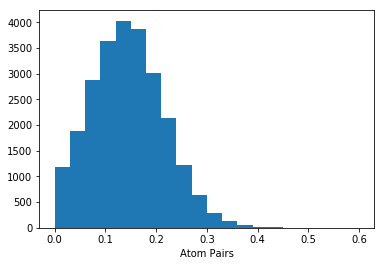

In [38]:
compareFPs(ms1,ms2,lambda x:rdMolDescriptors.GetAtomPairFingerprint(x),"Atom Pairs")


0.7 0.10714285714285714
0.8 0.1297709923664122
0.9 0.16494845360824742
0.95 0.19767441860465115
0.99 0.26373626373626374


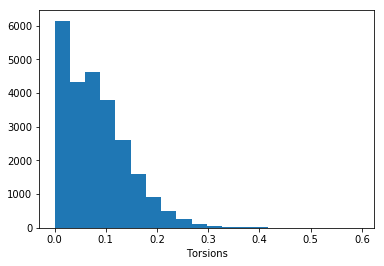

In [39]:
compareFPs(ms1,ms2,lambda x:rdMolDescriptors.GetTopologicalTorsionFingerprint(x),"Torsions")


## bit vectors

0.7 0.27593360995850624
0.8 0.30151843817787416
0.9 0.3365019011406844
0.95 0.36395759717314485
0.99 0.4153846153846154


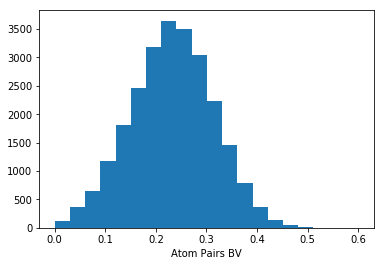

In [40]:
compareFPs(ms1,ms2,lambda x:rdMolDescriptors.GetHashedAtomPairFingerprintAsBitVect(x),"Atom Pairs BV")


0.7 0.1326530612244898
0.8 0.15555555555555556
0.9 0.1896551724137931
0.95 0.22105263157894736
0.99 0.2903225806451613


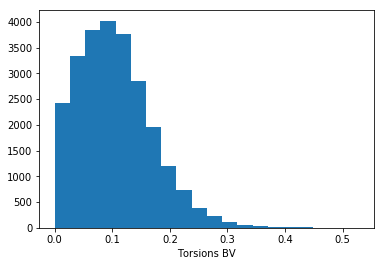

In [41]:
compareFPs(ms1,ms2,lambda x:rdMolDescriptors.GetHashedTopologicalTorsionFingerprintAsBitVect(x),"Torsions BV")


# Avalon

0.7 0.36890243902439024
0.8 0.40773809523809523
0.9 0.4624277456647399
0.95 0.5042492917847026
0.99 0.5788043478260869


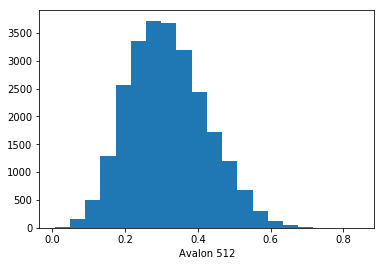

In [44]:
compareFPs(ms1,ms2,lambda x:pyAvalonTools.GetAvalonFP(x,512),"Avalon 512")


0.7 0.26931106471816285
0.8 0.29802955665024633
0.9 0.3409090909090909
0.95 0.3770491803278688
0.99 0.45073375262054505


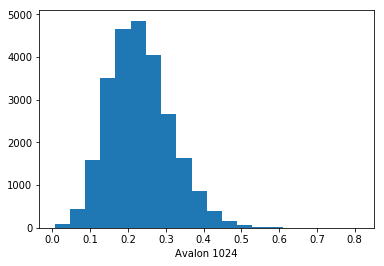

In [45]:
compareFPs(ms1,ms2,lambda x:pyAvalonTools.GetAvalonFP(x,1024),"Avalon 1024")


# Avalon Counts

0.7 0.30017554125219426
0.8 0.3343195266272189
0.9 0.38112927191679047
0.95 0.41715542521994137
0.99 0.49660326086956524


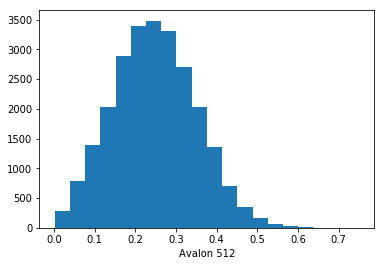

In [46]:
compareFPs(ms1,ms2,lambda x:pyAvalonTools.GetAvalonCountFP(x,512),"Avalon 512")


0.7 0.2671232876712329
0.8 0.30026246719160105
0.9 0.3462121212121212
0.95 0.3845223700120919
0.99 0.4689572031344183


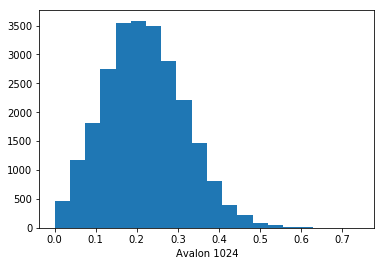

In [47]:
compareFPs(ms1,ms2,lambda x:pyAvalonTools.GetAvalonCountFP(x,1024),"Avalon 1024")
